In [1]:
# from web3 import Web3
import pandas as pd
from tqdm import tqdm
import ast #eval() to interpret code
import warnings
warnings.filterwarnings('ignore')
tqdm.pandas()
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import json
import numpy as np
from web3 import Web3
import time

In [4]:
data = pd.read_csv('stability_fee_jul2023.csv')
data

,block_timestamp,input
0,2020-12-19 09:05:50 UTC,0x44e2a5a8555344542d41000000000000000000000000...
1,2020-12-19 20:31:52 UTC,0x44e2a5a8434f4d502d41000000000000000000000000...
2,2020-12-19 12:56:58 UTC,0x44e2a5a842414c2d4100000000000000000000000000...
3,2022-01-01 11:23:43 UTC,0x44e2a5a85257413030342d4100000000000000000000...
4,2021-05-18 02:26:56 UTC,0x44e2a5a8554e4956324c494e4b4554482d4100000000...
...,...,...
280332,2021-08-17 17:48:43 UTC,0x44e2a5a85a52582d4100000000000000000000000000...
280333,2021-08-14 01:38:38 UTC,0x44e2a5a85a52582d4100000000000000000000000000...
280334,2021-09-29 17:41:32 UTC,0x44e2a5a85a52582d4100000000000000000000000000...
280335,2021-03-16 09:02:51 UTC,0x44e2a5a85a52582d4100000000000000000000000000...


In [16]:
jug = open("MCD-JUG.txt", 'r').read()
w3 = Web3()
contract = w3.eth.contract(abi=jug)

In [17]:
def decode(df):
  index = ['fn_name','args','timestamp']
  tuple_result = contract.decode_function_input(df['input'])

  func_name = tuple_result[0].fn_name
  arg = tuple_result[1]
  time = df['block_timestamp']

  data = (func_name, arg , time)
  table = pd.Series(data = data, index = index)

  return table

In [18]:
result = data.progress_apply(decode, axis=1)

  0%|          | 0/280337 [00:00<?, ?it/s]

100%|██████████| 280337/280337 [06:13<00:00, 750.81it/s] 


In [19]:
result.to_csv('res_decode_stability_jul2023.csv')

Read file

In [20]:
result  = pd.read_csv('res_decode_stability_jul2023.csv')
result.drop(columns=['Unnamed: 0'], inplace=True)

In [21]:
file = result[result['fn_name'] == 'file']
file['timestamp'] = pd.to_datetime(file['timestamp'])
file = file.sort_values(by=['timestamp'])
file = file.reset_index(drop=True)
file

,fn_name,args,timestamp
0,file,{'what': b'vow\x00\x00\x00\x00\x00\x00\x00\x00...,2019-11-13 19:19:02+00:00
1,file,{'what': b'base\x00\x00\x00\x00\x00\x00\x00\x0...,2019-11-13 19:52:49+00:00
2,file,{'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...,2019-11-13 20:06:02+00:00
3,file,{'ilk': b'BAT-A\x00\x00\x00\x00\x00\x00\x00\x0...,2019-11-13 20:06:37+00:00
4,file,{'ilk': b'SAI\x00\x00\x00\x00\x00\x00\x00\x00\...,2019-11-13 20:07:20+00:00
...,...,...,...
349,file,{'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...,2023-07-18 20:05:11+00:00
350,file,{'ilk': b'WBTC-C\x00\x00\x00\x00\x00\x00\x00\x...,2023-07-18 20:05:11+00:00
351,file,{'ilk': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00...,2023-07-18 20:05:11+00:00
352,file,{'ilk': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x...,2023-07-18 20:05:11+00:00


In [24]:
def clean_args(df):
  ''' will return column 'args' in table with dictionary without special characters'''
  df['args'] = df['args'].apply(lambda x: x.replace("b'", "'"))
  df['args'] = df['args'].apply(lambda x: x.replace("\\x00", ""))
  df['args'] = df['args'].apply(lambda x: x.replace("\'", "\""))
  return df

In [25]:
tab = clean_args(file)
tab

,fn_name,args,timestamp
0,file,"{""what"": ""vow"", ""data"": ""0xA950524441892A31ebd...",2019-11-13 19:19:02+00:00
1,file,"{""what"": ""base"", ""data"": 0}",2019-11-13 19:52:49+00:00
2,file,"{""ilk"": ""ETH-A"", ""what"": ""duty"", ""data"": 10000...",2019-11-13 20:06:02+00:00
3,file,"{""ilk"": ""BAT-A"", ""what"": ""duty"", ""data"": 10000...",2019-11-13 20:06:37+00:00
4,file,"{""ilk"": ""SAI"", ""what"": ""duty"", ""data"": 1000000...",2019-11-13 20:07:20+00:00
...,...,...,...
349,file,"{""ilk"": ""ETH-A"", ""what"": ""duty"", ""data"": 10000...",2023-07-18 20:05:11+00:00
350,file,"{""ilk"": ""WBTC-C"", ""what"": ""duty"", ""data"": 1000...",2023-07-18 20:05:11+00:00
351,file,"{""ilk"": ""WSTETH-A"", ""what"": ""duty"", ""data"": 10...",2023-07-18 20:05:11+00:00
352,file,"{""ilk"": ""WBTC-A"", ""what"": ""duty"", ""data"": 1000...",2023-07-18 20:05:11+00:00


In [26]:
tab['ilk'] = tab['args'].apply(lambda x: json.loads(x).get('ilk', None))
tab['what'] = tab['args'].apply(lambda x: json.loads(x).get('what', None))
tab['data'] = tab['args'].apply(lambda x: json.loads(x).get('data', None))
tab

,fn_name,args,timestamp,ilk,what,data
0,file,"{""what"": ""vow"", ""data"": ""0xA950524441892A31ebd...",2019-11-13 19:19:02+00:00,None,vow,0xA950524441892A31ebddF91d3cEEFa04Bf454466
1,file,"{""what"": ""base"", ""data"": 0}",2019-11-13 19:52:49+00:00,None,base,0
2,file,"{""ilk"": ""ETH-A"", ""what"": ""duty"", ""data"": 10000...",2019-11-13 20:06:02+00:00,ETH-A,duty,1000000001243680656318820312
3,file,"{""ilk"": ""BAT-A"", ""what"": ""duty"", ""data"": 10000...",2019-11-13 20:06:37+00:00,BAT-A,duty,1000000001243680656318820312
4,file,"{""ilk"": ""SAI"", ""what"": ""duty"", ""data"": 1000000...",2019-11-13 20:07:20+00:00,SAI,duty,1000000000000000000000000000
...,...,...,...,...,...,...
349,file,"{""ilk"": ""ETH-A"", ""what"": ""duty"", ""data"": 10000...",2023-07-18 20:05:11+00:00,ETH-A,duty,1000000001072474267302354182
350,file,"{""ilk"": ""WBTC-C"", ""what"": ""duty"", ""data"": 1000...",2023-07-18 20:05:11+00:00,WBTC-C,duty,1000000001679727448331902751
351,file,"{""ilk"": ""WSTETH-A"", ""what"": ""duty"", ""data"": 10...",2023-07-18 20:05:11+00:00,WSTETH-A,duty,1000000001072474267302354182
352,file,"{""ilk"": ""WBTC-A"", ""what"": ""duty"", ""data"": 1000...",2023-07-18 20:05:11+00:00,WBTC-A,duty,1000000001754822903403114680


In [47]:
mask = (tab['ilk'] == 'ETH-A') | (tab['ilk'] == 'USDC-A') | (tab['ilk'] == 'GUNIV3DAIUSDC2-A') | (tab['ilk'] == 'WBTC-A') | (tab['ilk'] == 'ETH-C') | (tab['ilk'] == 'GUNIV3DAIUSDC1-A') | (tab['ilk'] == 'ETH-B')
progs_data = tab[mask]
progs_data = progs_data.reset_index(drop=True)
progs_data.drop(columns = ['args','what'], inplace = True)

In [48]:
times = 60*60*24*365
progs_data['rate_year'] = progs_data['data'].apply(lambda x: (x/1e27)**times)
progs_data.drop(columns = ['data'], inplace = True)
progs_data['percentage'] = progs_data['rate_year'].apply(lambda x: round((x-1)*100,2))
cols = ['timestamp', 'percentage', 'ilk']
progs_data = progs_data[cols]
progs_data

,timestamp,percentage,ilk
2,2019-11-13 20:06:02+00:00,4.00,ETH-A
6,2020-01-08 10:32:20+00:00,6.00,ETH-A
7,2020-01-26 11:54:51+00:00,8.00,ETH-A
9,2020-02-04 11:35:48+00:00,9.00,ETH-A
12,2020-02-09 01:15:35+00:00,8.00,ETH-A
...,...,...,...
343,2023-06-19 14:00:47+00:00,3.49,ETH-C
345,2023-07-18 20:05:11+00:00,3.94,ETH-B
347,2023-07-18 20:05:11+00:00,3.19,ETH-C
349,2023-07-18 20:05:11+00:00,3.44,ETH-A


In [49]:
progs_data.to_csv('rate_makerdao_top7_progs.csv')

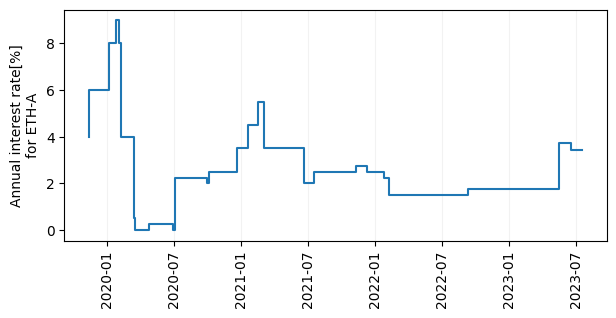

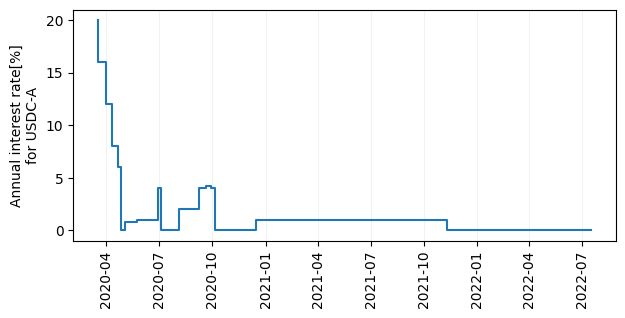

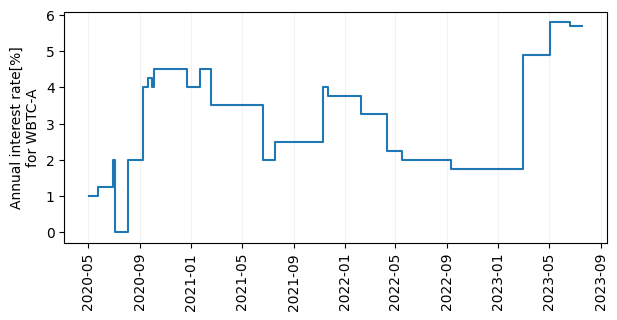

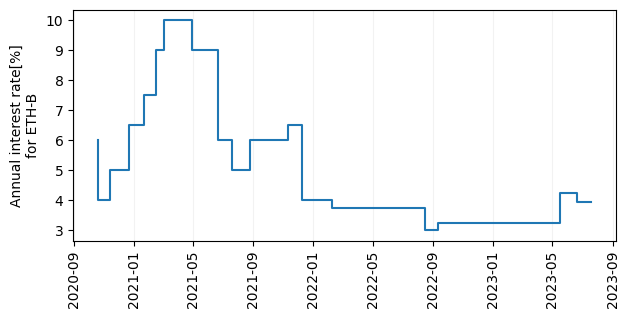

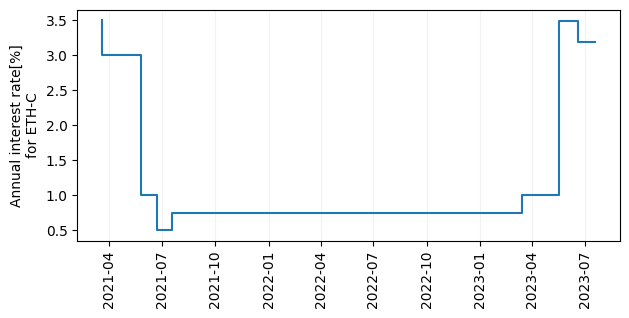

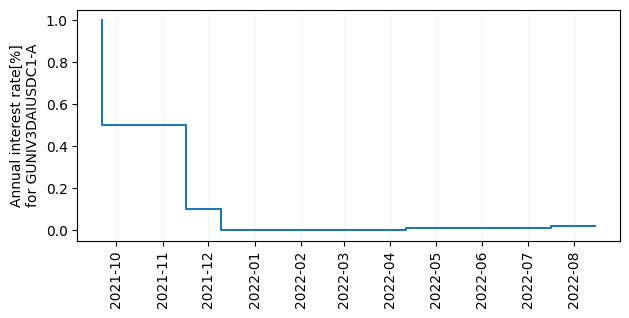

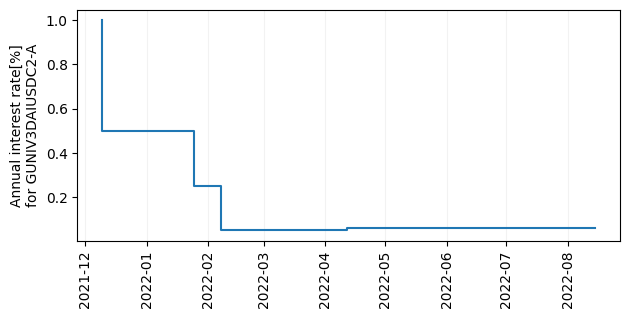

In [50]:
for prog in progs_data.ilk.unique():
    program = prog
    X = progs_data[progs_data['ilk'] == prog]['timestamp']
    Y = progs_data[progs_data['ilk'] == prog]['percentage']
    plt.figure(figsize=(7,3))
    plt.step(X, Y, drawstyle='steps')# label = 'fee') #, where='post', label='post')
    # plt.plot(X, Y, 'o--', color='grey', alpha=0.3)
    plt.xticks(rotation = 90)
    plt.grid(axis='x', color='0.95')
    plt.ylabel(f'Annual interest rate[%]\nfor {program}')
    # plt.legend()
    plt.savefig(f'annual_rate_{program}.pdf', bbox_inches='tight')
    # fig.savefig('test_fig06.pdf', bbox_inches='tight')
    plt.show()